### Add Text Logo To Image

#### Sample

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

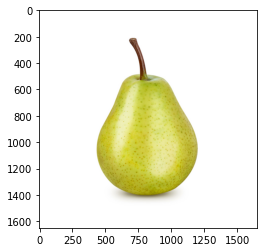

In [74]:
img = cv2.imread("armut.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [75]:
img_2 = np.copy(img)

In [76]:
text = "Armut"
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
font_size = 10
#color = cv2.COLOR_BGR2RGB
color = (0,0,255)
thickness = 30

In [77]:
textsize = cv2.getTextSize(text, font, font_size, thickness)[0]

In [78]:
textX = (img_2.shape[1] - textsize[0]) / 2  # x center
textY = (img_2.shape[0] - (textsize[1]/2)) # textY = (img.shape[0] + textsize[1]) / 2  for y center

In [79]:
origin = (int(textX), int(textY))
origin

(410, 1577)

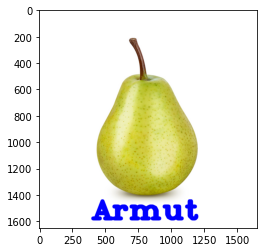

In [80]:
img_2 = cv2.putText(img_2, text, origin, font, font_size, color, thickness)
plt.imshow(img_2)

In [81]:
cv2.imwrite("armut_logo.jpg", img_2)

True

#### Multi Logo To Image

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner

# word start and end
word_start = 0  # 0  # native word start index
word_end = 20  # 200  # native word end index

In [3]:
path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"

#Path(path).mkdir(parents=True, exist_ok=True)

In [4]:
def logo_add_to_image(text_list, data_folder_name, data_path, out_folder_name, out_path, font = cv2.FONT_HERSHEY_COMPLEX_SMALL, font_size = 10, color = (0,0,255), thickness = 30):
    result_path = f"{out_path}/{out_folder_name}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    no_image_file_list = []    
    for text in text_list:
        #text = f"{text}"
        try:
            img = cv2.imread(f"{data_path}/{data_folder_name}/{text}.jpg")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_2 = np.copy(img)
            textsize = cv2.getTextSize(text, font, font_size, thickness)[0]
            textX = (img_2.shape[1] - textsize[0]) / 2  # x center
            textY = (img_2.shape[0] - (textsize[1]/2)) # textY = (img.shape[0] + textsize[1]) / 2  for y center
            origin = (int(textX), int(textY))
            img_2 = cv2.putText(img_2, text, origin, font, font_size, color, thickness)
            cv2.imwrite(f"{out_path}/{out_path}/{text}.jpg", img_2)
        except:
            no_image_file_list.append(text)
            pass
        
    return no_image_file_list


In [5]:
#df_word_all = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.lower().capitalize()}/Deployment/Data/Word/Word_Merge_Preprocess.xlsx")
df_word_all = pd.read_excel("test.xlsx")
df_word_all

,word
0,kendi
1,şimdi
2,sen
3,mi
4,ne
5,oluyor
6,biliyor
7,musun
8,bu
9,şimdi


In [6]:
df_word_select = df_word_all.iloc[word_start:word_end,]
df_word_select

,word
0,kendi
1,şimdi
2,sen
3,mi
4,ne
5,oluyor
6,biliyor
7,musun
8,bu
9,şimdi


In [7]:
word_select_list = df_word_select["word"].values.tolist()

In [ ]:
image_path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"